# Calculating Returns

In [1]:
import numpy as np
import pandas as pd

In [2]:
prices = np.array([8.7, 8.91, 8.71])
prices[1]/prices[0]-1
prices[1:] / prices[:-1] - 1

df_prices = pd.DataFrame({'BLUE':[8.7, 8.91, 8.71, 8.43, 8.73],
                          'ORANGE':[10.66, 11.08, 10.71, 11.59, 12.11]})
df_prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [3]:
df_prices.iloc[1:] / df_prices[:-1].values -1 #Removing index from one varible
df_prices/df_prices.shift(1) - 1 # Shifting to the 1 row
df_prices.pct_change() # Using pct_change function from Pandas Dataframe


,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


BLUE      0.023977
ORANGE    0.079601
dtype: float64
BLUE      0.123310
ORANGE    0.087167
dtype: float64


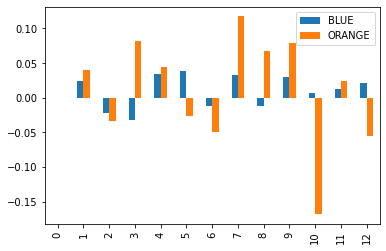

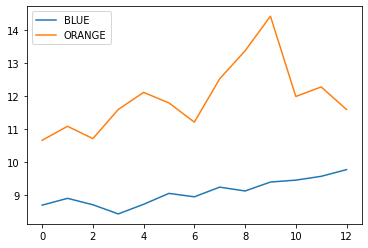

In [4]:
df_sample = pd.read_csv('course_1/sample_prices.csv')
df_sample

df_returns = df_sample.pct_change()
df_returns.plot.bar()
df_sample.plot()
print(df_returns.std()) # Standard Deviation of returns

df_returns = df_returns + 1

# using numpy to compound the returns
print(np.prod(df_returns)-1)


## Annualization of Returns

In [5]:
rm = 0.01 # 1% return per month
(1+rm) ** 12 -1 # return over a year

rd = 0.0001
(1+rd)**252 -1 # daily returns times trading days

0.025518911987694626

# Risk-Adjusted Returns

In [20]:
df_returns.std()

# calculating volatility step by step
deviations = df_returns - df_returns.mean()
sq_dev = deviations ** 2
vari = sq_dev.mean()
volatility = np.sqrt(vari) # remember that the standard deviation divides by n-1

print(volatility)
print(df_returns.std())

vari = sq_dev.sum()/(df_returns.shape[0] -1)
volatility = np.power(vari, 0.5)
print(volatility)

ann_volat = df_returns.std()*np.sqrt(12) # annualizing volatility
print(ann_volat)

BLUE      0.022957
ORANGE    0.076212
dtype: float64
BLUE      0.023977
ORANGE    0.079601
dtype: float64
BLUE      0.022957
ORANGE    0.076212
dtype: float64
BLUE      0.083060
ORANGE    0.275747
dtype: float64


SmallCap    0.454825
LargeCap    0.497063
dtype: float64


SmallCap    0.373346
LargeCap    0.336392
dtype: float64

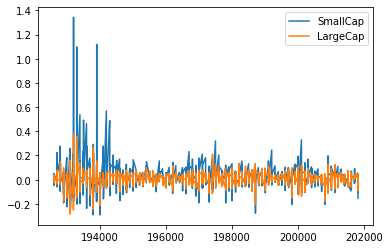

In [41]:
# loading the dataset, indicating if it has header and telling it to try to figure out dates and specifying a value
# for the na's (99.99)
returns = pd.read_csv('course_1/Portfolios_Formed_on_ME_monthly_EW.csv', header=0, index_col=0,parse_dates=True,
                      na_values=99.99)

columns = ['Lo 10', 'Hi 10']
returns = returns[columns]/100
returns.columns = ['SmallCap', 'LargeCap']
returns.plot.line()

returns.std()

annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

# annualizing returns
return_per_month = (returns + 1).prod() ** (1/returns.shape[0]) -1
return_per_month

annualized_return = (return_per_month + 1) ** (12) - 1
annualized_return

# risk-adjusted return
print(annualized_return / annualized_vol)

riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return / annualized_vol
sharpe_ratio # SmallCap give you a slightly superior return over LargeCap